In [13]:
from operator import itemgetter
from src.utils import DataParser, utils
import pandas as pd
from src.detections import Detector, Tracker
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

In [22]:
frames = utils.load_frames_from_images('../data/SoccerNetGS/gamestate-2024/test/SNGS-118/img1')

In [3]:
model = YOLO("../training/runs/detect/train4/weights/best.pt")
detector = Detector(model, 0.5)
tracker = Tracker(detector)

In [4]:
tracks = tracker.track(frames)


0: 384x640 10 players, 1 ball, 50.0ms
Speed: 7.0ms preprocess, 50.0ms inference, 73.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 players, 9.0ms
Speed: 2.0ms preprocess, 9.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 players, 1 ball, 9.0ms
Speed: 2.0ms preprocess, 9.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 players, 1 ball, 10.0ms
Speed: 2.0ms preprocess, 10.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 players, 9.0ms
Speed: 1.0ms preprocess, 9.0ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 players, 1 ball, 12.0ms
Speed: 1.0ms preprocess, 12.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 players, 1 ball, 11.0ms
Speed: 1.0ms preprocess, 11.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 players, 11.0ms
Speed: 1.0ms preprocess, 11.0ms infere

In [10]:
tracks[0]

Detections(xyxy=array([[     166.14,       404.4,      230.48,      523.41],
       [     643.25,      605.19,      729.06,      773.58],
       [     1001.8,      791.81,      1074.7,      995.21],
       [     212.41,      255.53,      248.58,      349.42],
       [     968.76,      370.25,      1027.4,      468.86],
       [     49.656,      545.92,       137.1,      711.37],
       [     845.81,      251.03,      882.92,      349.02],
       [       1639,      425.39,      1685.5,      564.24],
       [     364.79,       223.5,      401.84,         307],
       [     1625.3,      186.06,      1674.7,      236.27]], dtype=float32), mask=None, confidence=array([    0.81455,     0.76636,     0.76083,     0.75708,      0.7555,       0.753,     0.75115,     0.73421,     0.70463,     0.55973], dtype=float32), class_id=array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), tracker_id=array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), data={'class_name': array(['player', 'player', 'player', 'player', 'playe

In [15]:
cv2.imshow('papapapapa', frames[0])
cv2.waitKey(0)
cv2.destroyAllWindows()

In [23]:
anotated_frames = tracker.annotate_frames(frames)

In [39]:
cv2.imshow('papapapapa', anotated_frames[10])
cv2.waitKey(0)
cv2.destroyAllWindows()

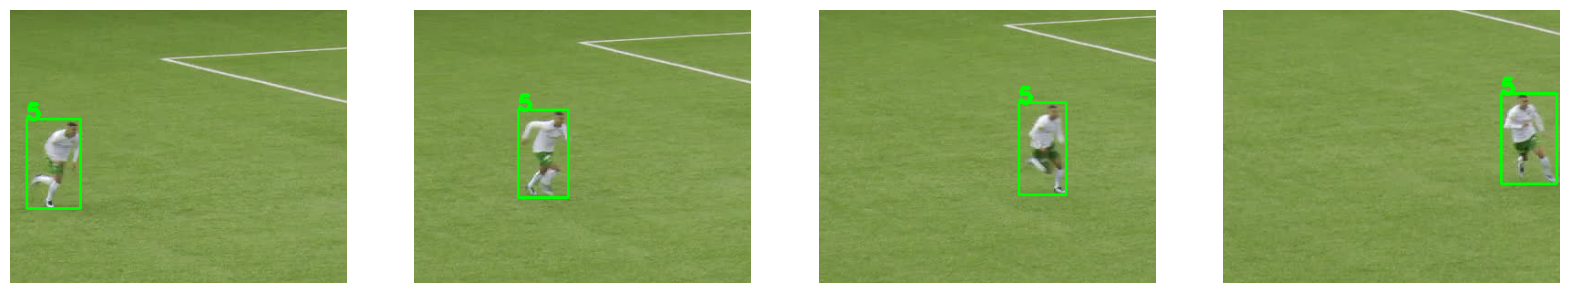

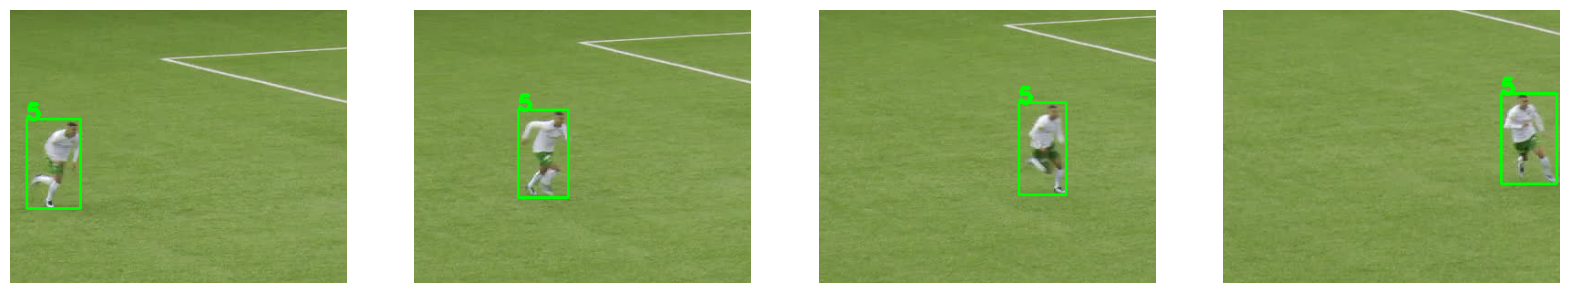

In [71]:
# draw 5 frames next to each other no space between them only middle of the frame
fig, axs = plt.subplots(1, 4, figsize=(20, 10))
for i, frame in enumerate(anotated_frames[:40:10]):
    axs[i].imshow(cv2.cvtColor(frame[250:550, 950:1320], cv2.COLOR_BGR2RGB))
    axs[i].axis('off')
plt.savefig('../figures/tracking.png')
plt.show()
fig